# Laboratorio 04: Interpolación.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Diego Felipe Diaz Perez
*Métodos computacionales 2025-I*

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as sci
import sympy as sp

# 1.

Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los datos de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.

```
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
```

- Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando $t=10$ s.
- ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

In [ ]:
#a
t = np.array([0, 3, 5, 8, 13]) # segundos
d= np.array([0, 225, 383, 623, 993]) # metros
v= np.array([75, 77, 80, 74, 72]) # metros/segundo
herp=sci.CubicHermiteSpline(t,d,v)
cubp=sci.CubicSpline(t,d)
print("posicion hermite:",herp(10))
print("posicion cubicspline:",cubp(10))
cubv=sci.CubicSpline(t,v)
print("velocidad en t=10",cubv(10))

posicion hermite: 771.96
posicion cubicspline: 778.4190647482014
velocidad en t=10 68.61510791366906


In [ ]:
#b
xi=np.linspace(min(t),max(t),100)
print("velocidad maxima cubicspline:",max(cubv(xi)))

velocidad maxima cubicspline: 79.99880391414267


# 2.
Los valores de la aceleración gravitacional $g$ dependen de la altitud $y$ según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. Grafique la distribución de la función de interpolación obtenida junto con los datos dados.

```
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
```

gravedad para 5000 m: 9.7946541015625 m/s^2
gravedad para 42000 m: 9.681858665 m/s^2
gravedad para 90000 m: 9.538415624999999 m/s^2


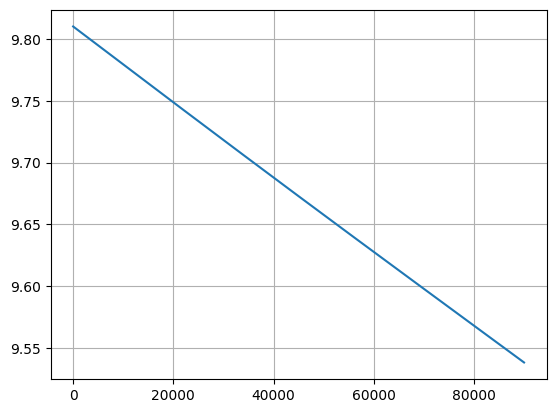

In [ ]:
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
def diferencias_divididas(x, y):
  n = len(y)
  coef = np.zeros([n, n])
  coef[:,0] = y
  for j in range(1, n):
    for i in range(n - j):
      coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])
  return coef[0, :]
def newton(x, y, xi):
  coef=diferencias_divididas(x,y)
  n = len(coef) - 1
  p = coef[n]
  for k in range(1, n + 1):
    p = coef[n - k] + (xi - x[n - k]) * p
  return p
xi=np.linspace(0,90000,1000)
print("gravedad para 5000 m:",newton(y,g,5000),"m/s^2")
print("gravedad para 42000 m:",newton(y,g,42000),"m/s^2")
print("gravedad para 90000 m:",newton(y,g,90000),"m/s^2")
plt.plot(xi,newton(y,g,xi))
plt.grid()

# 3.
La densidad del aire $\rho$ depende de la temperatura $T$ como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

```
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
```



densidad del aire a 250 K 1.3975329155606775 kg/m^3
densidad del aire a 800 K 0.4964089902361972 kg/m^3
densidad del aire a 3000 K 1561.1658667948516 kg/m^3


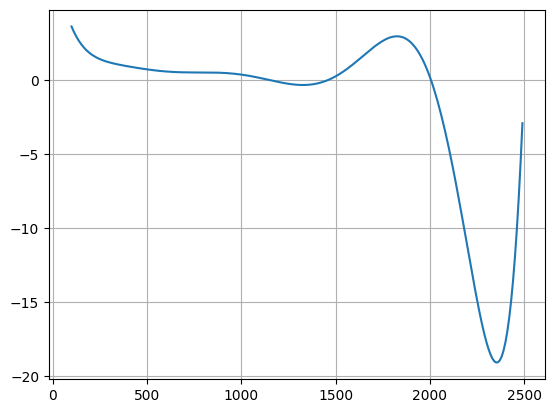

In [ ]:
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
print("densidad del aire a 250 K", newton(T,rho,250),"kg/m^3")
print("densidad del aire a 800 K", newton(T,rho,800),"kg/m^3")
print("densidad del aire a 3000 K", newton(T,rho,3000),"kg/m^3")
xi=np.arange(100,2500,10)
plt.plot(xi,newton(T,rho,xi))
plt.grid()

# 4.
Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 $\Omega$ a $0^{\circ}$ C y cambia alrededor de 0.39 $\Omega/^{\circ}$ C. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

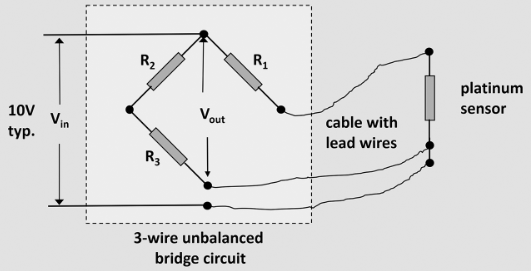




A continuación se presentan mediciones tomadas de dicho circuito, con $R_1 = R_2 = 5$ $k\Omega$ y $R_3 = 120$ $\Omega$:

```
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
```

Un termómetro de resistencia de platino estándar de 100 $\Omega$ tiene una resistencia de 139.27 $\Omega$ a $100^\circ$ C. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida. ¿Qué conclusión puede obtener?

voltaje a 139.27Ω: -0.3701534922704801
resistencia cuando v=0: 119.99914551777368


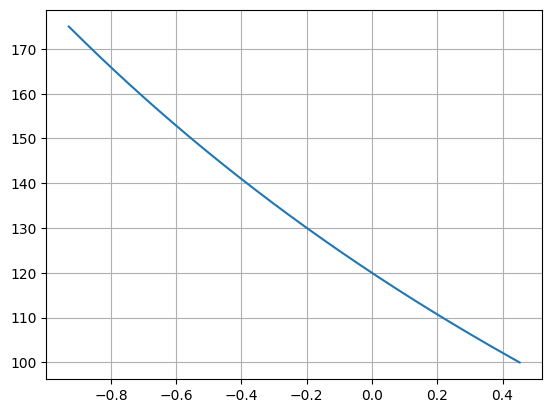

In [ ]:
#a
r= np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
v = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
cub=sci.CubicSpline(r,v)
print("voltaje a 139.27Ω:",cub(139.27))
#b
v_i=v[::-1]
r_i=r[::-1]
buc=sci.CubicSpline(v_i,r_i)
print("resistencia cuando v=0:",buc(0))
xi=np.linspace(min(v_i),max(v_i),1000)
plt.plot(xi,buc(xi))
plt.grid()

# 5.
El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.

```
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
```

In [ ]:
l= np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
r= np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
cub=sci.CubicSpline(r,l)
print("longitud de onda cuando el indice de refraccion es 1.520:", cub(1.520))

longitud de onda cuando el indice de refraccion es 1.520: 4482.265120487942
